## Networks in Python

ALL biological systems have a network representation, consisting of nodes for the biological entities of interest, and edges or links for the relationships between them. Here are some examples:
* Metabolic networks
* Gene regulatory networks
* Individual-Individual (e.g., social networks)
* Who-eats-whom (Food web) networks
* Mutualistic (e.g., plant-pollinator) networks

*Can you think of a few more examples from biology?*

You can easily simulate, analyze, and visualize biological networks in both `python` and `R` using some nifty packages. A full network analysis tutorial is out of the scope of our Python module's objectives, but let's try a simple visualization using the ` networkx` python package.

For this you need to first install the package, for example, by using:

```bash
sudo apt-get install python3-networkx
```

### Food web network example

As an example, let's plot a food web network. 

The best way to store a food web dataset is as an "adjacency list" of who eats whom: a matrix with consumer name/id in 1st column, and resource name/id in 2nd column, and a separate matrix of species names/ids and properties such as biomass (node's abundance), or average body mass. You will see what these data structures look like below. 

First, import the necessary modules:

In [351]:
import networkx as nx
import scipy as sc
import matplotlib.pylab as p

Let's generate a "synthetic" food web. We can do this with the following function that generates a random adjacency list of a $N$-species food web with "connectance probability" $C$: the probability of having a link between any pair of species in the food web. 

In [353]:
def GenRdmAdjList(N = 2, C = 0.5):
    """ 
    """
    Ids = range(N)
    ALst = []
    for i in Ids:
        if np.random.uniform(0,1,1) < C:
            Lnk = np.random.choice(Ids,2).tolist()
            if Lnk[0] != Lnk[1]: #avoid self (e.g., cannibalistic) loops
                ALst.append(Lnk)
    return ALst

Note that we are using a uniform random distribution between `[0,1]` to generate a connectance probability between each species pair. 

Now assign number of species (`MaxN`) and connectance (`C`):

In [354]:
MaxN = 30
C = 0.75

Now generate an adjacency list representing a random food web:

In [355]:
AdjL = np.array(GenRdmAdjList(MaxN, C))
AdjL

array([[19,  1],
       [ 2, 16],
       [10,  1],
       [27,  6],
       [17,  2],
       [15,  1],
       [ 0, 20],
       [ 5, 17],
       [ 7, 21],
       [ 2, 11],
       [29, 18],
       [24, 19],
       [22, 24],
       [17, 12],
       [15,  3],
       [ 2, 20],
       [18,  1],
       [23,  8],
       [14, 25],
       [ 0, 16],
       [24,  2],
       [ 2, 17],
       [ 8,  4],
       [19, 10],
       [14,  9]])

So that's what an adjacency list looks like. The two columns of numbers correspond to the consumer and resource ids, respectively.  

Now generate species (node) data:

In [356]:
Sps = np.unique(AdjL) # get species ids

Now generate body sizes for the species. We will use a log$_{10}$ scale because species body sizes tend to be [log-normally distributed](08-Data_R.ipynb#Histograms).

In [357]:
SizRan = ([-10,10]) #use log10 scale
Sizs = np.random.uniform(SizRan[0],SizRan[1],MaxN)
Sizs

array([ 4.08112155, -5.11324359,  7.68974381, -3.31798254,  3.38797618,
        9.39345206,  2.26660928,  2.27083014,  6.12392189, -2.1262544 ,
       -5.77496835, -9.95614353,  6.57041735,  2.83203911,  4.53348574,
        2.26395084,  8.46746965,  0.09363984, -3.01542157, -6.59512916,
        0.45257127, -3.7022502 , -1.53286719,  6.60144475, -5.0706783 ,
       -6.02307656, -2.82113331, -2.66175869, -0.05079794,  1.60263371])

Let's visualize the size distribution we have generated.

(array([1., 1., 4., 5., 2., 4., 5., 2., 3., 3.]),
 array([-9.95614353, -8.02118397, -6.08622441, -4.15126485, -2.21630529,
        -0.28134574,  1.65361382,  3.58857338,  5.52353294,  7.4584925 ,
         9.39345206]),
 <BarContainer object of 10 artists>)

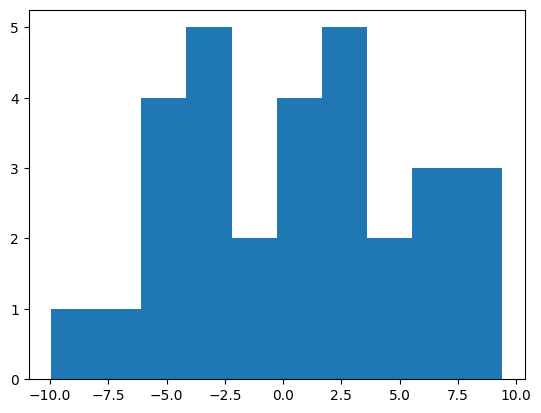

In [358]:
p.hist(Sizs) #log10 scale

(array([28.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.10625812e-10, 2.47429830e+08, 4.94859659e+08, 7.42289489e+08,
        9.89719319e+08, 1.23714915e+09, 1.48457898e+09, 1.73200881e+09,
        1.97943864e+09, 2.22686847e+09, 2.47429830e+09]),
 <BarContainer object of 10 artists>)

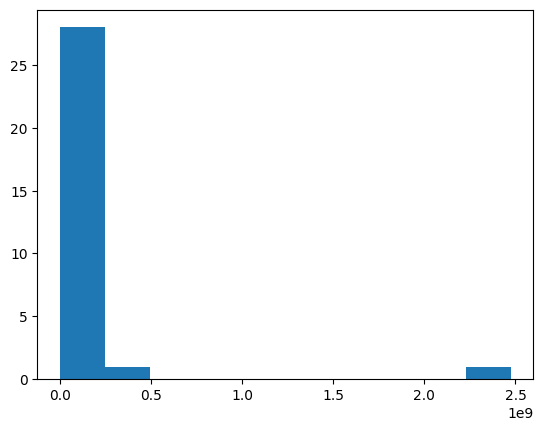

In [359]:
p.hist(10 ** Sizs) #raw scale

Now let's plot the network, with node sizes proportional to (log) body size:

In [360]:
p.close('all') # close all open plot objects

Let's use a circular configuration. For this, we need to calculate the coordinates, easily done using networkx:

In [361]:
pos = nx.circular_layout(Sps)

See `networkx.layout` for inbuilt functions to compute other types of node coordinates.

Now generate a networkx graph object:

In [362]:
G = nx.Graph()

Now add the nodes and links (edges) to it:

In [363]:
G.add_nodes_from(Sps)
G.add_edges_from(tuple(AdjL))

Note that the function `add_edges_from` needs the adjacency list as a tuple.

Now generate node sizes that are proportional to (log) body sizes:

In [364]:
NodSizs= 1000 * (Sizs-min(Sizs))/(max(Sizs)-min(Sizs)) 

Now render (plot) the graph:

ValueError: s must be a scalar, or float array-like with the same size as x and y

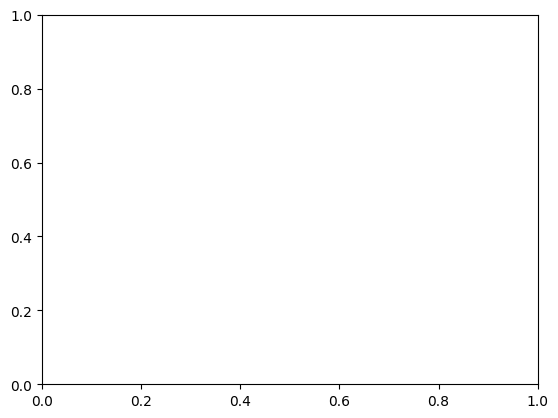

In [365]:
nx.draw_networkx(G, pos, node_size = NodSizs)

You might get a warning. In that case, try upgrading the networkx package.   

### Practicals

#### Plot the foodweb

Type the above code for plotting a food web network in a program file called `DrawFW.py`. This file should save the plotted network as a pdf.   

#### Groupwork: networks in R 

You can also do nice network visualizations in R. Here you will convert a network visualization script written in `R` using the `igraph` package to a python script that does the same thing.

* First copy the script file called `Nets.R` and the data files it calls and run it. This script visualizes the [QMEE CDT collaboration network](http://www.imperial.ac.uk/qmee-cdt), coloring the the nodes by the type of node (organization type: "University","Hosting Partner", "Non-hosting Partner").

* Now, convert this script to a Python script that does the same thing, including writing to a `.svg` file using the same QMEE CDT link and node data. You can use `networkx` or some other python network visualization package.